##19it085-SGP
##What is Image Segmentation?
You would have probably heard about object detection and image localization. When there is a single object present in an image, we use image localization technique to draw a bounding box around that object. 

In the case of object detection, it provides labels along with the bounding boxes; hence we can predict the location as well as the class to which each object belongs.

Image segmentation results in more detailed information about the shape of an image and thus an extension of the concept of Object Detection.

We segment i.e. divide the images into regions of different colors which helps in differentiate an object from the other at a finer level and we also classify image into different classes.


In [1]:
!pip install pyyaml==5.1
!pip show pyyaml  

     |████████████████████████████████| 274 kB 25.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=f5981e6a730872e44de128c1cb19fa765f20c695c48dcbfab9f8cc67971e852f
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Name: PyYAML
Version: 5.1
Summary: YAML parser and emitter for Python
Home-page: https://github.com/yaml/pyyaml
Author: Kirill Simonov
Author-email: xi@resolvent.net
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: PyDrive, fastai, distributed, coveralls, bokeh


In [2]:
import tensorflow as tf
tf.__version__


'2.8.0'

In [3]:
#!nvidia-smi
!nvcc --version #10.1
!python --version # 3.7.6

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Python 3.7.13


In [4]:
!pip3 install torch==1.8.0 torchvision==0.9.0 -f https://download.pytorch.org/whl/cu101/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 763.5 MB 14 kB/s 
     |████████████████████████████████| 17.3 MB 53.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.8.0+cu101 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.8.0+cu101 which is incompatible.


In [5]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.8.0+cu101 False


In [6]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 14008, done.
remote: Total 14008 (delta 0), reused 0 (delta 0), pack-reused 14008
Receiving objects: 100% (14008/14008), 5.75 MiB | 24.05 MiB/s, done.
Resolving deltas: 100% (10127/10127), done.


In [7]:
%cd detectron2

/content/detectron2


In [8]:
!python setup.py build develop

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/tools
copying tools/train_net.py -> build/lib.linux-x86_64-3.7/tools
copying tools/plain_train_net.py -> build/lib.linux-x86_64-3.7/tools
copying tools/lazyconfig_train_net.py -> build/lib.linux-x86_64-3.7/tools
copying tools/visualize_data.py -> build/lib.linux-x86_64-3.7/tools
copying tools/benchmark.py -> build/lib.linux-x86_64-3.7/tools
copying tools/visualize_json_results.py -> build/lib.linux-x86_64-3.7/tools
copying tools/__init__.py -> build/lib.linux-x86_64-3.7/tools
copying tools/lightning_train_net.py -> build/lib.linux-x86_64-3.7/tools
copying tools/convert-torchvision-to-d2.py -> build/lib.linux-x86_64-3.7/tools
copying tools/analyze_model.py -> build/lib.linux-x86_64-3.7/tools
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
cre

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
pip install git+https://github.com/facebookresearch/fvcore.git

  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-ws2b_m3w
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-ws2b_m3w
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=65095 sha256=357350be7cdf75e20539b84482b37edb5533f9c66d3340af84c3d0486e9f679f
  Stored in directory: /tmp/pip-ephem-wheel-cache-yhfzn8jy/wheels/24/1d/09/8167de727fe5b74f832b6fcb5d9069d8f03ca29f337bfe484d
Successfully built fvcore
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
detectron2 0.6 requires black==21.4b2, which is not installed.
detectron2 0.6 requires hydra-core>=1.1, which is not installed.
detectron2 0.6 requires omegaconf>=2.1, which is not installed.
detectron2 0.6 requires scipy>1.5.1, but you have scipy 1.4.1 which is incompatible.


In [11]:
pip install omegaconf

     |████████████████████████████████| 74 kB 2.8 MB/s 
     |████████████████████████████████| 112 kB 53.8 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=6b1d7908cc334a4188e1018fbb9f9a2863a7156ba3155562df0d8672e2dff701
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
detectron2 0.6 requires black==21.4b2, which is not installed.
detectron2 0.6 requires hydra-core>=1.1, which is not installed.
detectron2 0.6 requires scipy>1.5.1, but you have scipy 1.4.1 which is incompatible.


In [12]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2


# get image
im = cv2.imread("/content/drive/MyDrive/SGP3/9247489789_132c0d534a_z.jpg")

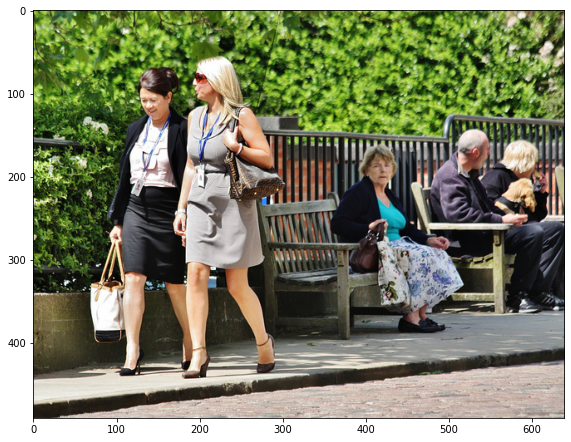

In [13]:
from IPython.display import Image
Image('../download.jpg')
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7.5))
plt.imshow(im[...,::-1]) #bgr to rgb


OBJECT DETECTION

In [14]:
cfg = get_cfg()
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

In [15]:
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)

model_final_f6e8b1.pkl: 243MB [00:05, 40.8MB/s]                           


In [16]:
outputs = predictor(im)

In [17]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0,  0,  0,  0, 26, 26, 26, 13, 16, 13,  0, 26, 13])
Boxes(tensor([[354.2129, 163.7125, 518.2180, 387.2803],
        [173.3268,  52.2962, 295.5143, 437.3482],
        [ 89.3589,  71.7208, 192.9714, 443.1716],
        [481.2060, 149.0713, 637.4270, 365.6397],
        [ 67.0615, 275.6441, 110.9144, 397.7901],
        [230.0905, 136.4105, 302.9670, 229.1380],
        [379.9330, 256.1554, 420.6739, 318.4516],
        [270.7379, 217.8678, 462.8848, 393.2684],
        [554.3923, 201.0090, 607.7976, 248.9364],
        [455.2148, 207.7206, 588.5319, 365.6103],
        [545.6215, 173.8680, 622.0412, 257.8858],
        [402.0969, 252.3730, 456.6153, 357.4214],
        [297.1147, 210.7084, 601.1684, 379.3000]]))


<Figure size 720x360 with 0 Axes>

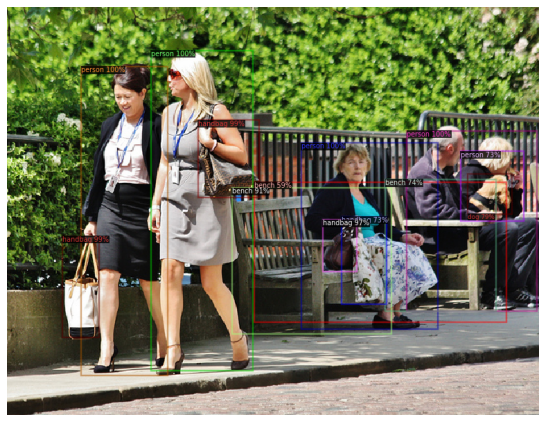

In [18]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');
plt.figure(figsize=(10,5))

cv2_imshow(out.get_image()[:, :, ::-1])

keypoint detection : detecting people and localizing their keypoints.

model_final_a6e10b.pkl: 237MB [00:05, 43.9MB/s]                           


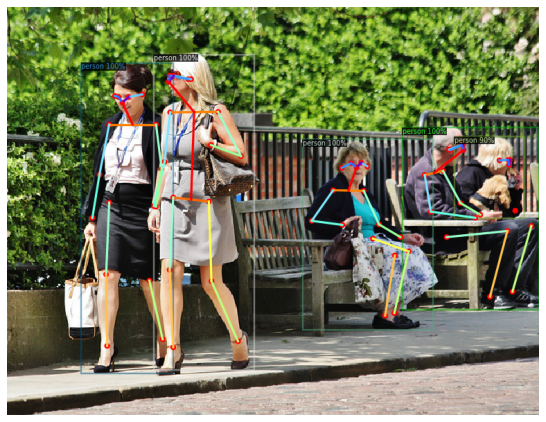

In [19]:
from detectron2 import model_zoo

# Inference with a keypoint detection model
cfg = get_cfg()   # get a fresh new config
cfg.MODEL.DEVICE = "cpu"

cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

im = cv2.imread("/content/drive/MyDrive/SGP3/9247489789_132c0d534a_z.jpg")

def cv2_imshow(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,7.5)), plt.imshow(im), plt.axis('off');

predictor = DefaultPredictor(cfg)
outputs = predictor(im)

v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

Panoptic segmentation model

model_final_cafdb1.pkl: 261MB [00:06, 38.1MB/s]                           


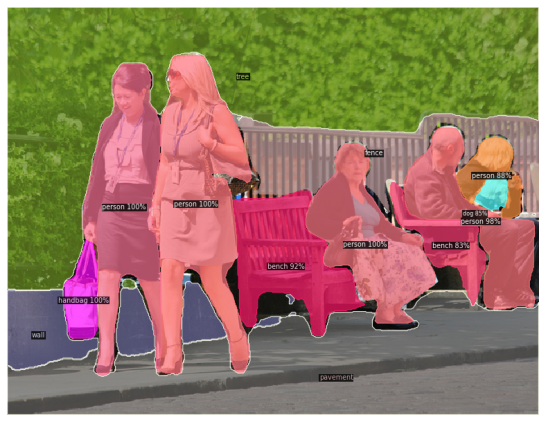

In [20]:
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"

cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")

predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

Image Segmentation

In [21]:
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

predictor = DefaultPredictor(cfg)
outputs = predictor(im)


model_final_f10217.pkl: 178MB [00:05, 35.2MB/s]                           


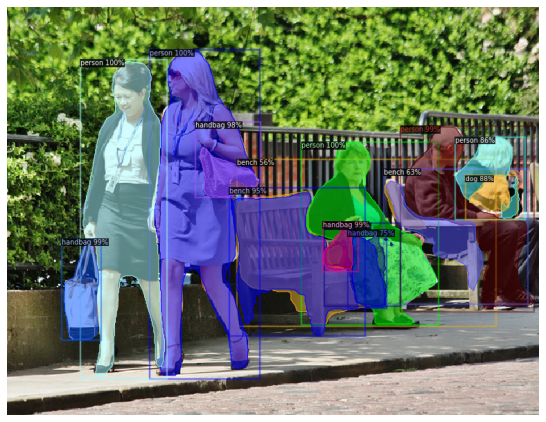

In [22]:
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])